## Clustering the Riders
Intro etc.

In [10]:
import sys
sys.path.append("..")

In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from src.dbops import fetch_riders
from src.kmeans_selection import PREPROCESSORS, compute_inertia_silhouette, plot_inertia_silhouette, model_summary

### Loading the Riders

In [12]:
project = ["name", "nationality", "weight", "height", "points"]
riders = fetch_riders(project=project)
riders = pd.json_normalize(riders)
riders.head()

,name,nationality,weight,height,points.classic,points.gc,points.tt,points.sprint,points.climber
0,david-zabriskie,United States,67.0,183.0,62,1058,3065,204,185
1,lance-armstrong,United States,72.0,178.0,3827,3642,3813,2732,1653
2,alexandre-vinokourov,Kazakhstan,68.0,177.0,3008,5726,4500,3510,3240
3,george-hincapie,United States,83.0,191.0,4618,2389,2331,4370,593
4,laszlo-bodrogi,France,NaN,187.0,828,1074,4949,796,76


### Exploring the Data

In [ ]:
riders.info()

In [ ]:
riders["nationality"].value_counts().head()

In [ ]:
riders.describe()

### Selecting the Best K-Means Model

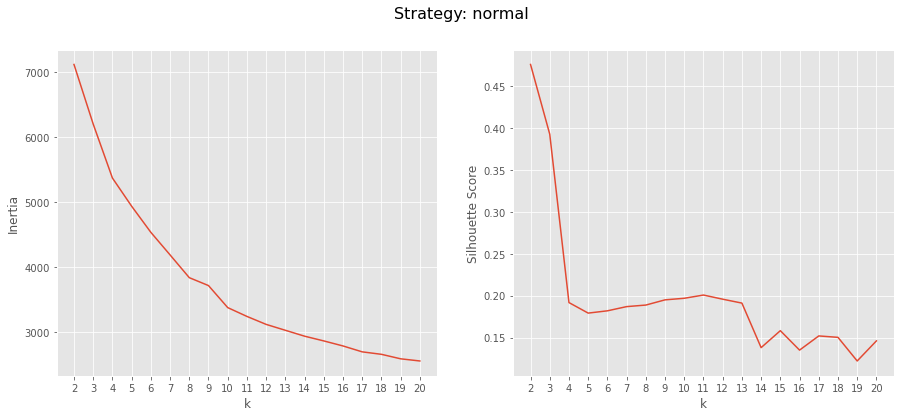

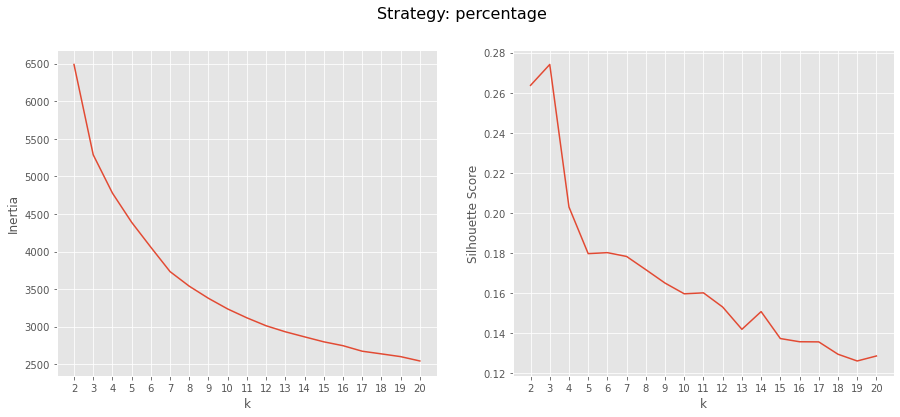

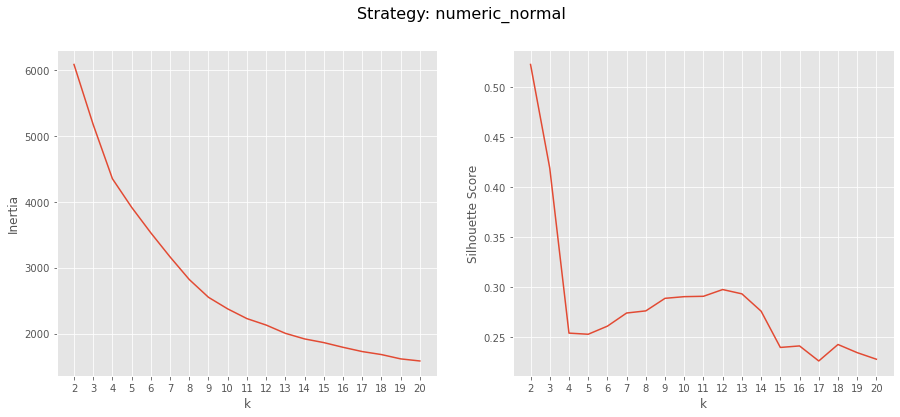

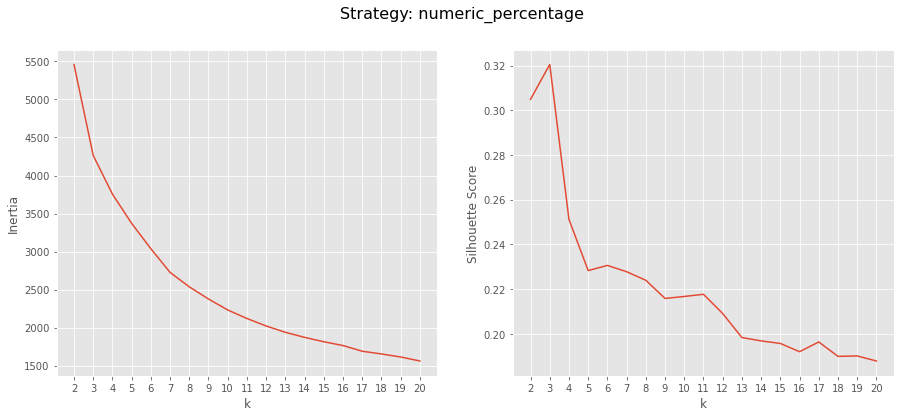

In [16]:
# Try different strategies
for strategy, preprocessor in PREPROCESSORS.items():
    inertia, silhouette = compute_inertia_silhouette(riders, preprocessor)
    plot_inertia_silhouette(inertia, silhouette, strategy)

In [13]:
from sklearn.cluster import KMeans

In [14]:
# Best model is strategy=numeric_normal and k=13
pipeline = Pipeline([
    ("preprocessor", PREPROCESSORS["numeric_normal"]),
    ("kmeans", KMeans(n_clusters=13)),
])

pipeline.fit(riders)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['weight', 'height',
                                                   'points.classic',
                                                   'points.gc', 'points.tt',
                                                   'points.sprint',
                                                   'points.climber'])])),
                ('kmeans', KMeans(n_clusters=13))])

In [15]:
# Model summary
model_summary(riders, pipeline)

-----------------------K-Means with 13 clusters: Summary------------------------
Inertia: 2023.4419754395542
Silhouette score: 0.29615580463811203
Riders in cluster 0: 99
Riders in cluster 1: 47
Riders in cluster 2: 33
Riders in cluster 3: 119
Riders in cluster 4: 153
Riders in cluster 5: 9
Riders in cluster 6: 146
Riders in cluster 7: 59
Riders in cluster 8: 19
Riders in cluster 9: 433
Riders in cluster 10: 20
Riders in cluster 11: 2
Riders in cluster 12: 5
